In [1]:

import pandas as pd
import re
import pickle
import csv
import numpy as np
import datetime
import string
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D 
import seaborn as sns
%matplotlib inline 

# read data
Location = r'/home/stratos/Downloads/crime.csv'
df = pd.read_csv(Location, error_bad_lines=False,
                 header=0,encoding='ISO-8859-13',sep=","
                 ,quotechar="\"",index_col=False,parse_dates=['OCCURRED_ON_DATE'])

# replace nan 
df=df.fillna(value={'SHOOTING':'N',
                    'Long' : 0.0,
                    'Lat' : 0.0
                   })

#df

/home/stratos/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# ex1


# Crimes per year

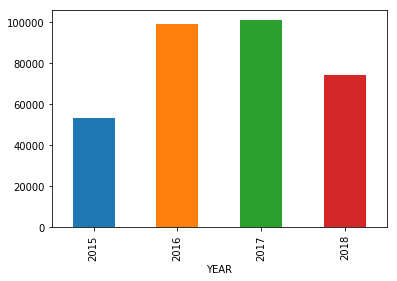

In [2]:

arr=df.groupby(['YEAR']).count()['INCIDENT_NUMBER'].plot(kind='bar')
plt.show()

# Crimes per month

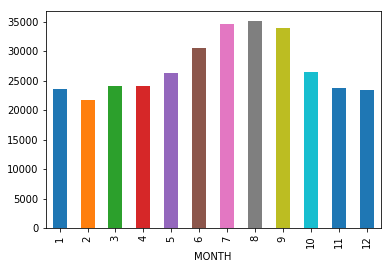

In [3]:
arr=df.groupby(['MONTH']).count()['INCIDENT_NUMBER'].plot(kind='bar')
plt.show()

# Crimes per day of week

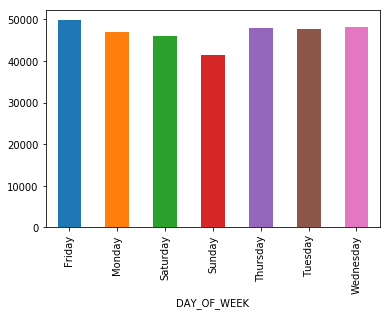

In [4]:
arr =df.groupby(['DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].plot(kind='bar')
plt.show()

# Crimes per DISTRICT

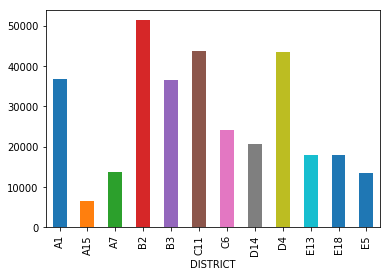

In [5]:
arr=df.groupby(['DISTRICT']).count()['INCIDENT_NUMBER'].plot(kind='bar')
plt.show()

# ex 2

# Most shootings per week

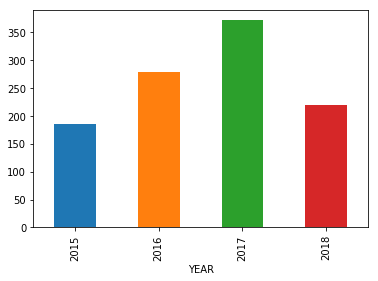

In [6]:
arr=df[df['SHOOTING']=='Y'].groupby(['YEAR']).count()['SHOOTING'].plot(kind='bar')
plt.show()

#  Most shootings per month

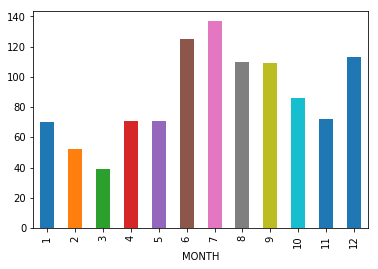

In [7]:
arr=df[df['SHOOTING']=='Y'].groupby(['MONTH']).count()['SHOOTING'].plot(kind='bar')
plt.show()

#  Most shootings per day of week

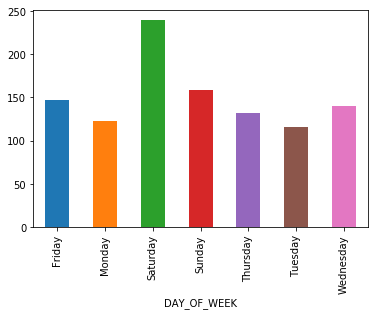

In [8]:
arr=df[df['SHOOTING']=='Y'].groupby(['DAY_OF_WEEK']).count()['SHOOTING'].plot(kind='bar')
plt.show()

#  Most shootings per destrict

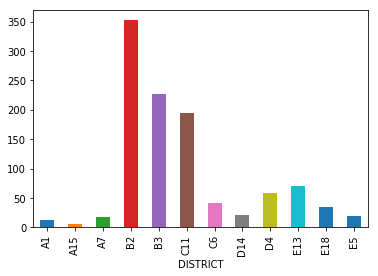

In [9]:
arr=df[df['SHOOTING']=='Y'].groupby(['DISTRICT']).count()['SHOOTING'].plot(kind='bar')
plt.show()

# ex3 more crimes on morrning 

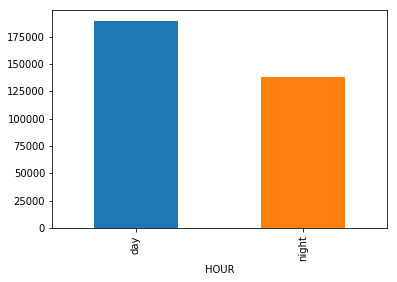

In [10]:
# er3

# make new column with day or night
six=datetime.time(18,0,0)
sixx=datetime.time(6,0,0)
df['HOUR']=df.apply(lambda row: 
                            'night' if
                                (datetime.datetime.combine(datetime.date.today(),row.OCCURRED_ON_DATE.time())
                                - datetime.datetime.combine(datetime.date.today(),sixx)).days==
                                (datetime.datetime.combine(datetime.date.today(),row.OCCURRED_ON_DATE.time())
                                - datetime.datetime.combine(datetime.date.today(),six)).days
                            else 'day'
                        ,axis=1)

# group by HOUR
a=df.groupby('HOUR').count()['INCIDENT_NUMBER'].plot(kind='bar')


# ex4 most common crime of day


In [11]:

#ta egglimata poy ginonte tin mera ana tipo egglimatos 
print("ta egglimata poy ginonte tin mera")
a=df[df['HOUR']=='day'].groupby('OFFENSE_CODE_GROUP')['INCIDENT_NUMBER'].count()
print(a)

# to pio sixno egglima tin mera
print(" most common crime in day is ",a.idxmax(),"committed by",a.max())

ta egglimata poy ginonte tin mera
OFFENSE_CODE_GROUP
Aggravated Assault                            3663
Aircraft                                        23
Arson                                           45
Assembly or Gathering Violations               319
Auto Theft                                    2421
Auto Theft Recovery                            693
Ballistics                                     436
Biological Threat                                2
Bomb Hoax                                       60
Burglary - No Property Taken                     2
Commercial Burglary                            581
Confidence Games                              2055
Counterfeiting                                1078
Criminal Harassment                             83
Disorderly Conduct                            1155
Drug Violation                               10226
Embezzlement                                   219
Evading Fare                                   159
Explosives                   

# ex5 

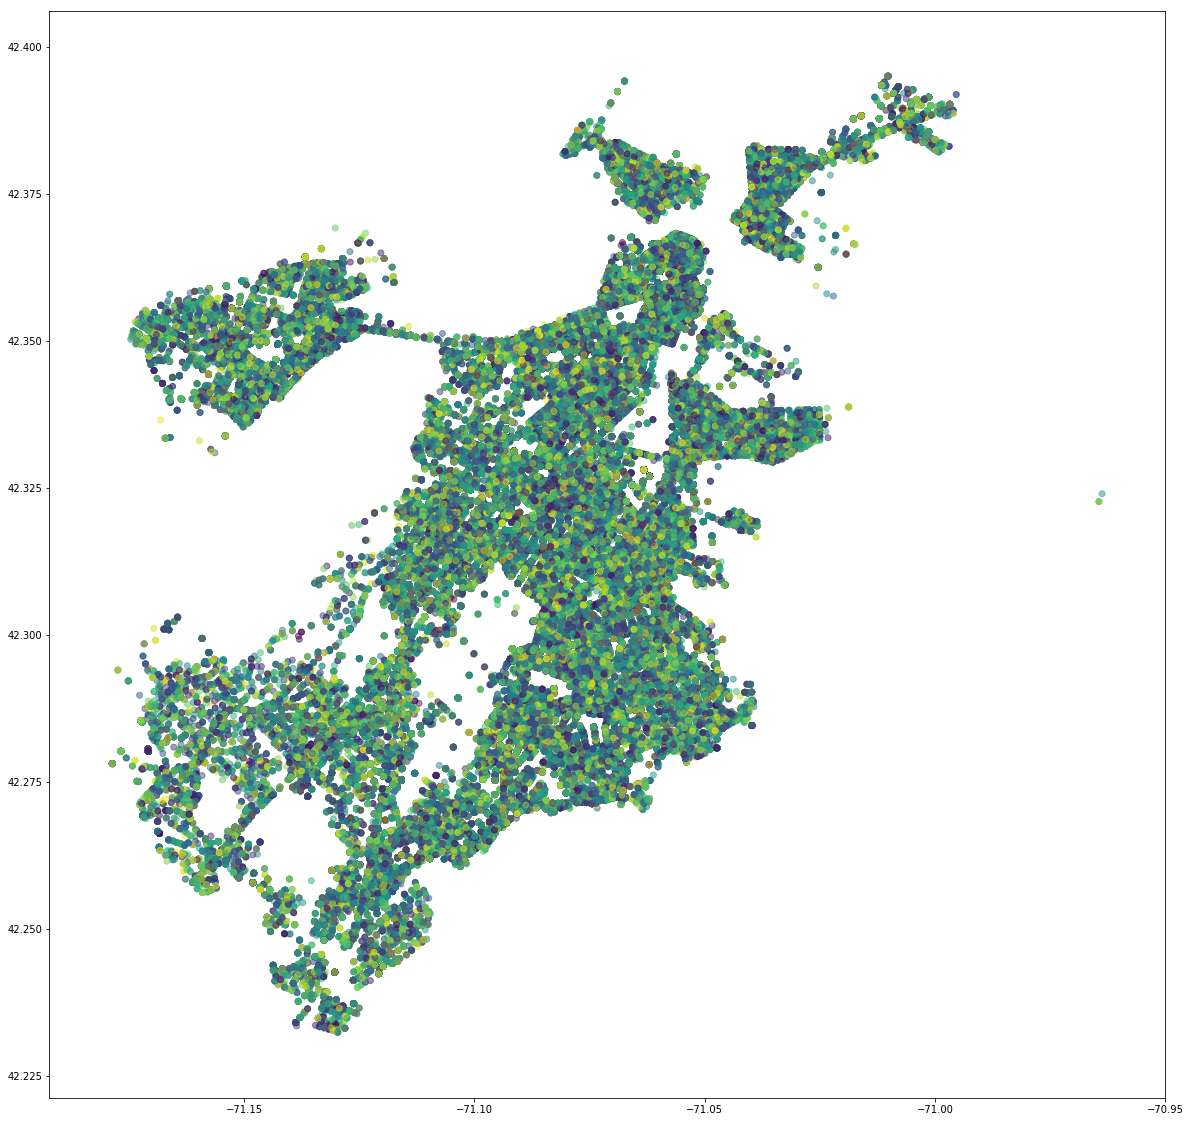

In [12]:
# er 5

# preparing data
location = df[['Lat','Long']] 
location = location.dropna() 
location = location.loc[(location['Lat']>40) & (location['Long'] < -60)]
x = location['Long'] 
y = location['Lat']
LABEL_COLOR_MAP = {0 : 'red',
                   1 : 'green',
                   2 : 'blue',
                   3 : 'yellow',
                   4 : 'purple'
                   }


# simple map without classification
colors = np.random.rand(len(location)) 
plt.figure(figsize=(20,20)) 
plt.scatter(x, y, alpha=0.5, c=colors) 
plt.show()


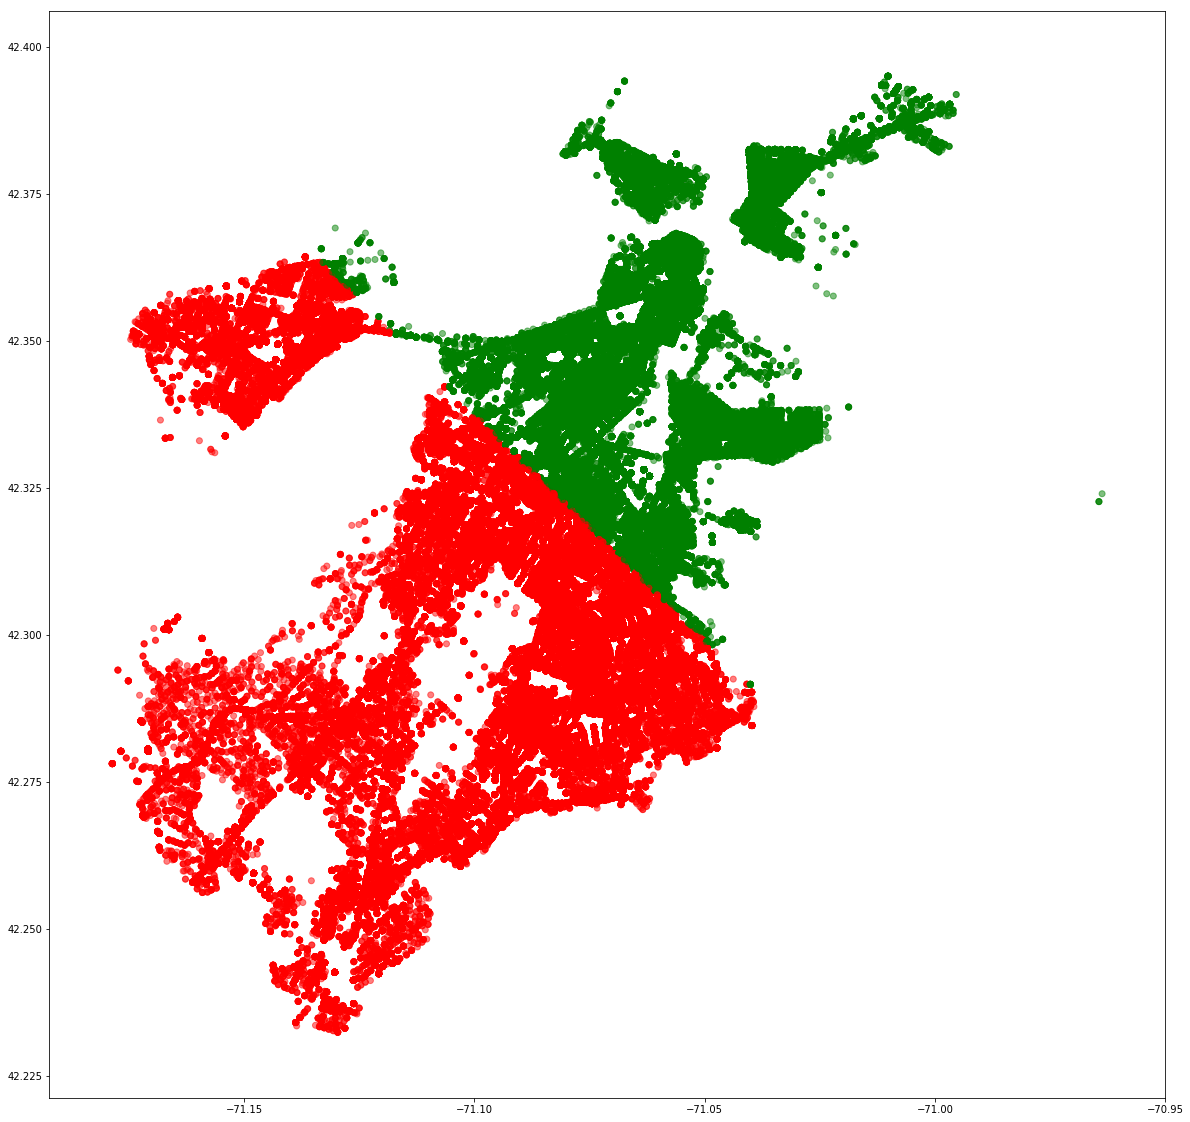

In [13]:
#KMeans classification n_clusters=2
km = KMeans(n_clusters=2) 
km.fit(location) 
km.predict(location) 
labels = km.labels_
# plot for 2 classes
label_color = [LABEL_COLOR_MAP[l] for l in labels]
plt.figure(figsize=(20,20)) 
plt.scatter(x, y, alpha=0.5, c=label_color) 
plt.show() 


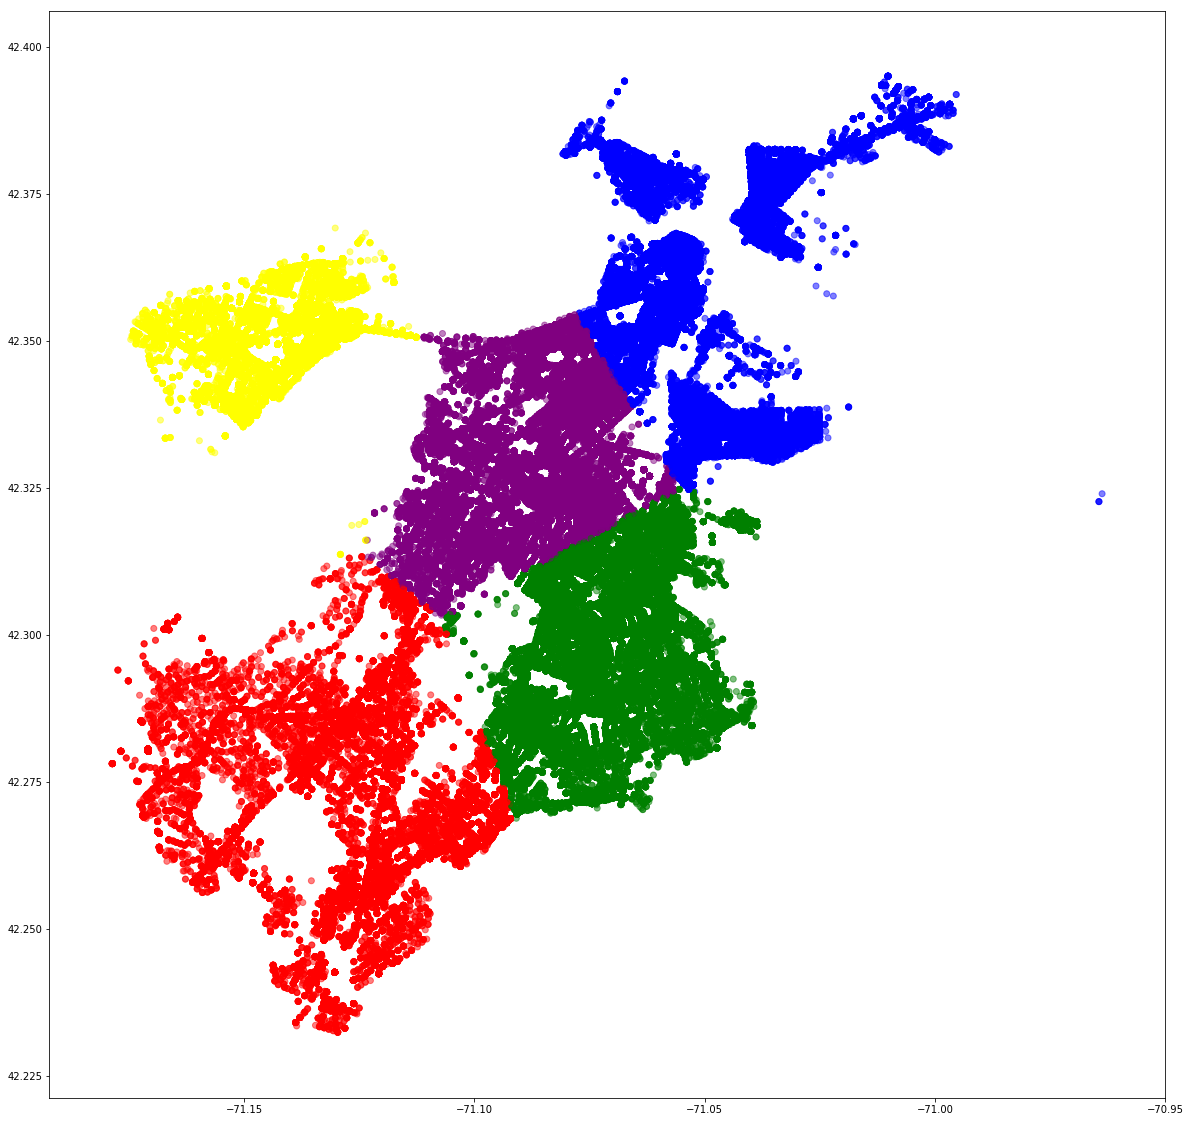

In [14]:
#KMeans classification n_clusters=5
km = KMeans(n_clusters=5) 
km.fit(location) 
km.predict(location) 
labels = km.labels_
# plot for 5 classes
label_color = [LABEL_COLOR_MAP[l] for l in labels]
plt.figure(figsize=(20,20))
plt.scatter(x, y, alpha=0.5, c=label_color) 
plt.show() 

In [16]:
import folium
from folium.features import DivIcon

m = folium.Map(location=[42.291145, -71.057083],
               tiles='cartodbpositron',
                zoom_start=11)


# preparing data
location = df[df['OFFENSE_CODE_GROUP']=='Drug Violation'][['Lat','Long']] 
location = location.dropna() 
location = location.loc[(location['Lat']>40) & (location['Long'] < -60)]

# KMeans classification n_clusters=15
km = KMeans(n_clusters=15) 
km.fit(location) 
km.predict(location) 
labels = km.labels_

location['cluster'] = labels

clusters_sum=location.groupby(['cluster']).count()['Lat']

maxx=clusters_sum.values.max()
i=0
for center in km.cluster_centers_:
    colors=int("f44141", 16)+(maxx-int(hex(clusters_sum[clusters_sum.index==i].values[0]),16))
    colors='#{0:06X}'.format(colors)

    folium.Circle(
        location=center,
        radius=500,
        popup=str(clusters_sum[clusters_sum.index==i].values[0]),
        color=colors,
        fill=True,
    ).add_to(m)
    i=i+1

m